# Marketing Campaign Analysis

## Project Objective
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was `$5 million`. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets:

1. Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

## Table of Contents
- [Importing Data & Libraries](#Importing-Data-&-Libraries)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Question 1 - Was the campaign a success?](#Question-1)
- [Question 2 - How should the campaign strategy be readjusted in the future to improve performance?](#Question-2)
- [Question 3 - How would the performance of campaign have changed if it was postponed to month 6?](#Question-3)

 ##  Importing Data & Libraries

In [1]:
import pandas as pd

In [2]:
client_data = pd.read_csv('client_data.csv')
print(f'Client data shape: {client_data.shape}')
client_data.head()

Client data shape: (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [3]:
deposit_data = pd.read_csv('deposit_data.csv')
print(f'Deposit data shape: {deposit_data.shape}')
deposit_data.head()

Deposit data shape: (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [4]:
calendar_data = pd.read_csv('calendar_data.csv')
print(f'Calendar data shape: {calendar_data.shape}')
calendar_data.head()

Calendar data shape: (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


The data above requires a 2 step merge as follows:
1. Merge client and deposit data on `client_id` column
2. Merge the resulting dataframe with calendar data on `deposit_date`/`gregorian_date`

In [5]:
# 1st merge
df = client_data.merge(deposit_data, on='client_id')

In [6]:
# 2nd merge
df = df.merge(calendar_data, left_on='deposit_date', right_on='gregorian_date', copy=False)

In [7]:
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


In [8]:
df.tail()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,2019-07-20,Month 2
480393,585677614443848,West,Own,80,Actual Deposit,438.0,Monthly,2019-07-20,2019-07-20,Month 2


Since both of the date columns give identical information as a result of the merge, the second date column which is `gregorian_date` will be dropped.

In [9]:
df.drop(columns='gregorian_date', inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2
...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,Month 2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480394 entries, 0 to 480393
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   client_id                   480394 non-null  int64  
 1   client_geographical_region  480394 non-null  object 
 2   client_residence_status     480394 non-null  object 
 3   client_age                  480394 non-null  int64  
 4   deposit_type                480394 non-null  object 
 5   deposit_amount              480394 non-null  float64
 6   deposit_cadence             480394 non-null  object 
 7   deposit_date                480394 non-null  object 
 8   month_name                  480394 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 36.7+ MB


# Exploratory Data Analysis

In [11]:
df.nunique()

client_id                     46347
client_geographical_region        4
client_residence_status           2
client_age                       81
deposit_type                      2
deposit_amount                 2477
deposit_cadence                   3
deposit_date                    153
month_name                        5
dtype: int64

In [12]:
df['client_geographical_region'].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [13]:
df['client_residence_status'].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [14]:
df['client_age'].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

<Axes: ylabel='Frequency'>

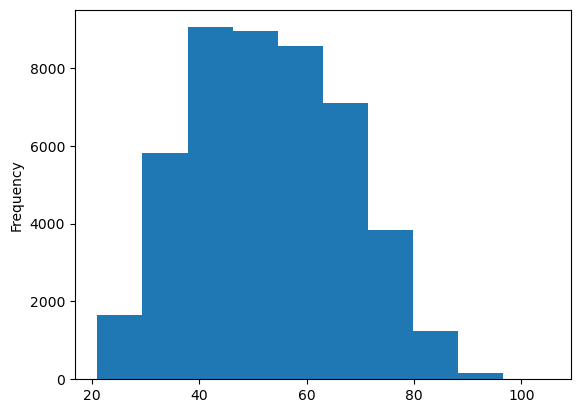

In [15]:
client_data['client_age'].plot(kind='hist')

<function matplotlib.pyplot.show(close=None, block=None)>

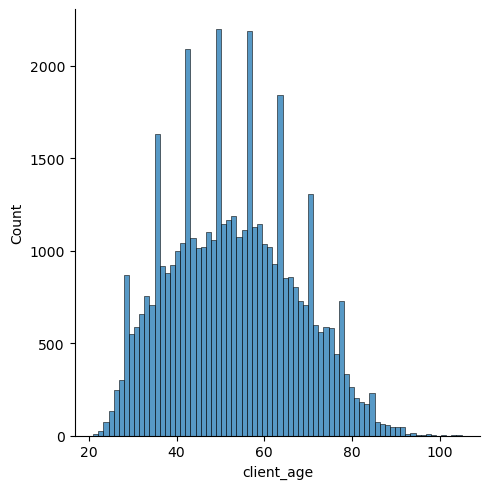

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(client_data['client_age'])
plt.show

In [17]:
calendar_data['month_name'].value_counts()

Month 2    31
Month 3    31
Month 5    31
Month 1    30
Month 4    30
Name: month_name, dtype: int64

The data above shows that there are 5 months worth of data and Month 1 and 4 have only 30 days each.

In [18]:
min_date = df['deposit_date'].min()
max_date = df['deposit_date'].max()
print(f'The data spans from {min_date} until {max_date}.')

The data spans from 2019-06-01 until 2019-10-31.


In [19]:
df['deposit_cadence'].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

In [20]:
df['deposit_cadence'].value_counts()/df.shape[0] * 100

Monthly     54.717170
Biweekly    43.545298
Extra        1.737532
Name: deposit_cadence, dtype: float64

54% of the clients choose to make monthly deposit where as only 1% of the clients make extra deposit.  

In [21]:
# Convert the date column type to datetime
df['deposit_date'] = pd.to_datetime(df['deposit_date'])
df.dtypes

client_id                              int64
client_geographical_region            object
client_residence_status               object
client_age                             int64
deposit_type                          object
deposit_amount                       float64
deposit_cadence                       object
deposit_date                  datetime64[ns]
month_name                            object
dtype: object

In [22]:
plt.rcParams['figure.figsize'] = (10,7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


Text(0.5, 0, 'Month')

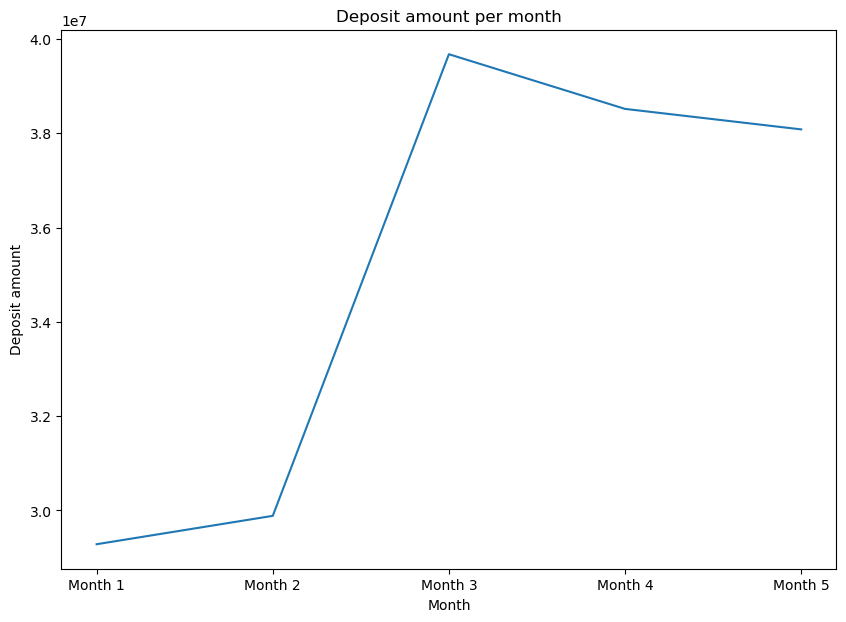

In [23]:
deposit_amount_by_month = df.groupby('month_name')['deposit_amount'].sum()

print(deposit_amount_by_month)

plt.plot(deposit_amount_by_month)
plt.title('Deposit amount per month')
plt.ylabel('Deposit amount')
plt.xlabel('Month')

month_name
Month 1     77827
Month 2     80205
Month 3    108505
Month 4    107494
Month 5    106363
dtype: int64


Text(0.5, 0, 'Month')

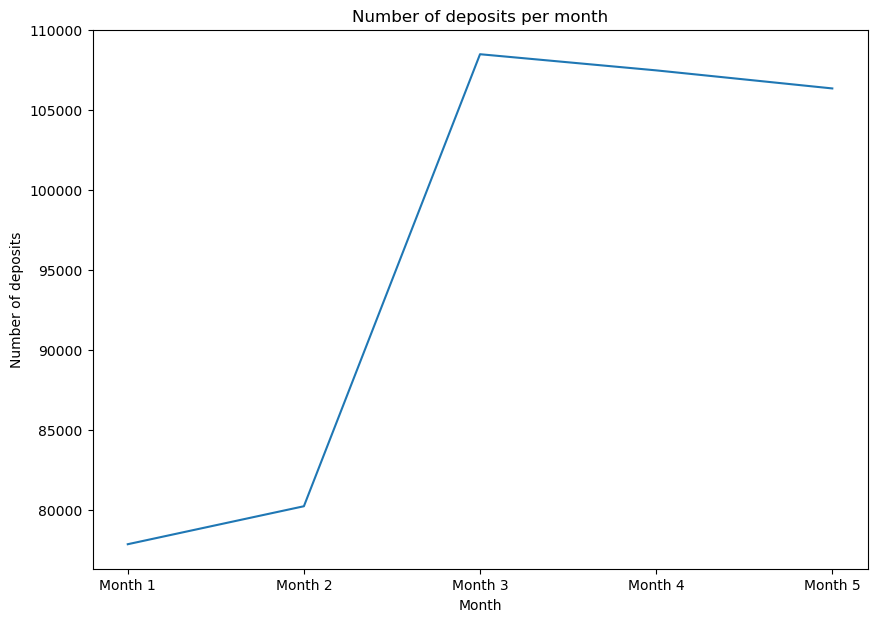

In [24]:
number_of_deposits_by_month = df.groupby('month_name').size()
print(number_of_deposits_by_month)

plt.plot(number_of_deposits_by_month)
plt.title('Number of deposits per month')
plt.ylabel('Number of deposits')
plt.xlabel('Month')

deposit_type
Actual Deposit       86077448.86
Scheduled Deposit    89365865.33
Name: deposit_amount, dtype: float64


Text(0.5, 0, 'Deposit type')

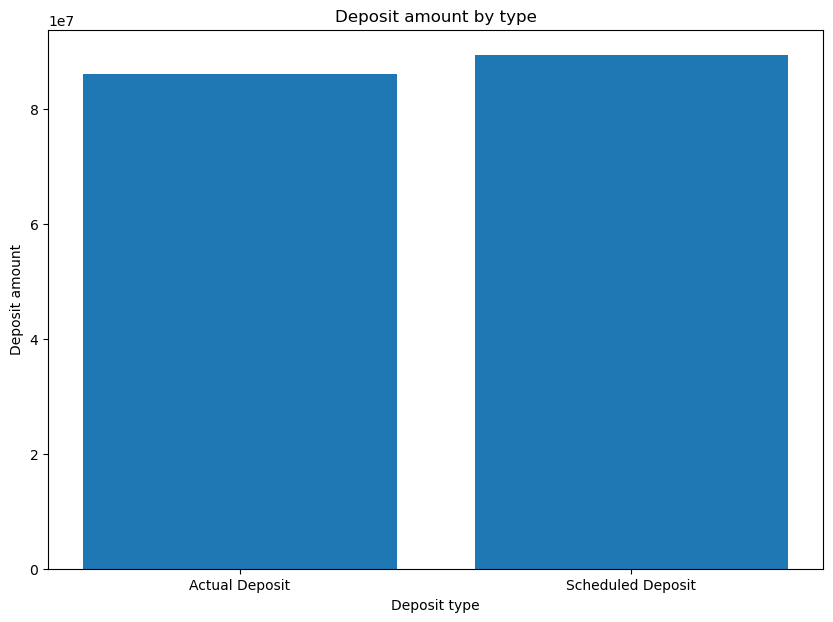

In [25]:
deposit_amount_by_type = df.groupby('deposit_type')['deposit_amount'].sum()
print(deposit_amount_by_type)

plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)
plt.title('Deposit amount by type')
plt.ylabel('Deposit amount')
plt.xlabel('Deposit type')

deposit_type
Actual Deposit       86077448.86
Scheduled Deposit    89365865.33
Name: deposit_amount, dtype: float64


Text(0.5, 0, 'Deposit cadence')

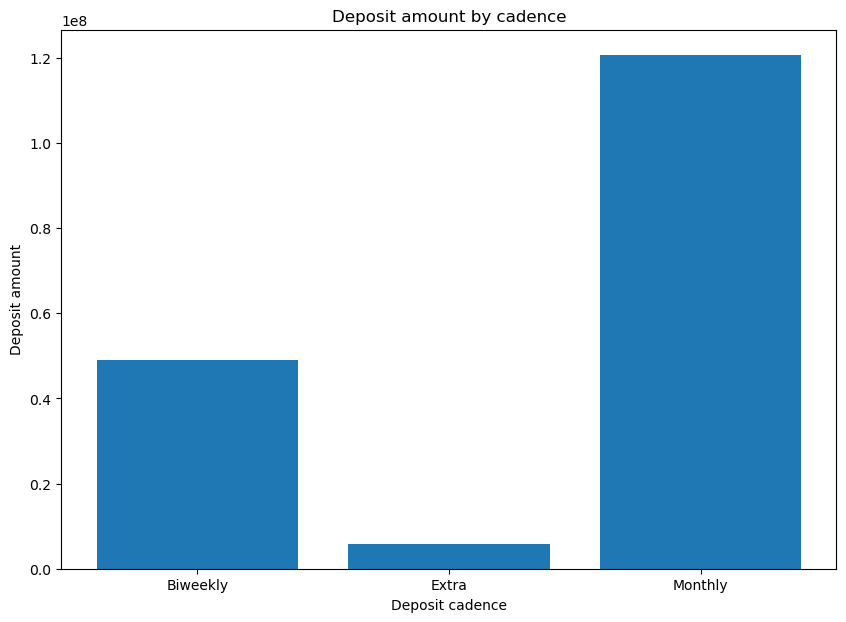

In [26]:
deposit_amount_by_cadence = df.groupby('deposit_cadence')['deposit_amount'].sum()
print(deposit_amount_by_type)

plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)
plt.title('Deposit amount by cadence')
plt.ylabel('Deposit amount')
plt.xlabel('Deposit cadence')

deposit_cadence     Biweekly       Extra      Monthly
month_name                                           
Month 1           8067092.64   862681.06  20355057.16
Month 2           8276132.98   967124.39  20643173.90
Month 3          10924866.19  1723684.35  27026506.56
Month 4          10901797.30  1215140.53  26398881.90
Month 5          10809396.84  1094136.23  26177642.16


Text(0.5, 1.0, 'Deposit amount per month and cadence')

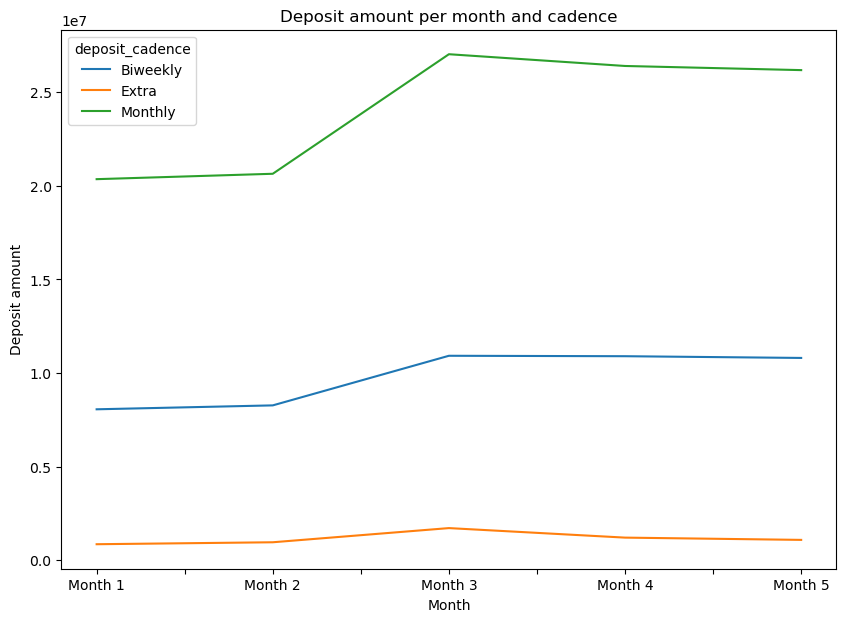

In [27]:
ax = df.groupby(['deposit_cadence', 'month_name'])['deposit_amount'].sum().unstack(level=0)
print(ax)

ax.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Deposit amount')
plt.title('Deposit amount per month and cadence')

client_geographical_region     Midwest   Northeast       South         West
month_name                                                                 
Month 1                     5430601.52  4445002.60  6889359.44  12519867.30
Month 2                     5499689.53  4629536.48  6946975.38  12810229.88
Month 3                     7229628.36  6284626.55  8975639.94  17185162.25
Month 4                     7176212.72  6068852.58  8714428.55  16556325.88
Month 5                     7069993.34  5996444.67  8623703.15  16391034.07


Text(0.5, 1.0, 'Deposit amount per month and region')

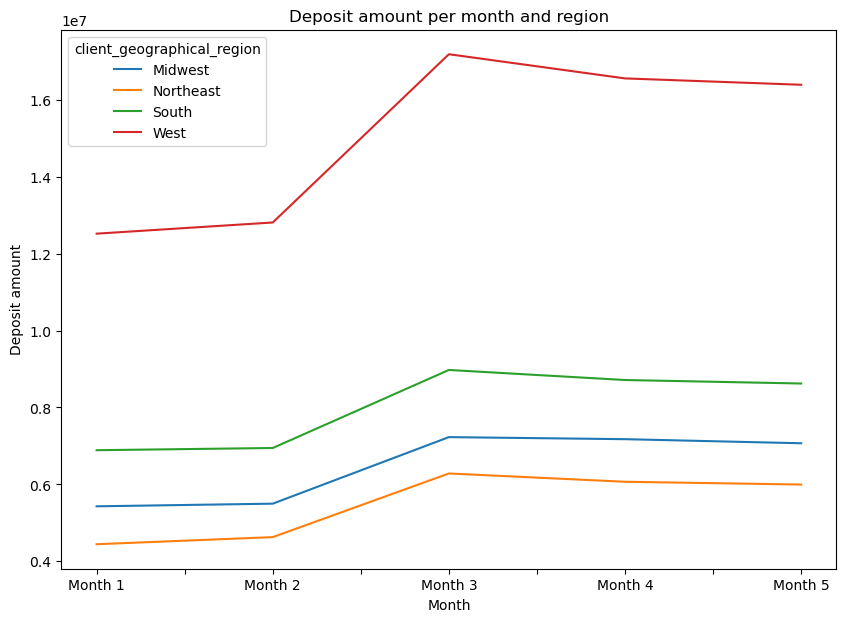

In [28]:
ax2 = df.groupby(['client_geographical_region', 'month_name'])['deposit_amount'].sum().unstack(level=0)
print(ax2)

ax2.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Deposit amount')
plt.title('Deposit amount per month and region')

client_geographical_region     Midwest   Northeast       South         West
month_name                                                                 
Month 1                     5430601.52  4445002.60  6889359.44  12519867.30
Month 2                     5499689.53  4629536.48  6946975.38  12810229.88
Month 3                     7229628.36  6284626.55  8975639.94  17185162.25
Month 4                     7176212.72  6068852.58  8714428.55  16556325.88
Month 5                     7069993.34  5996444.67  8623703.15  16391034.07


Text(0.5, 1.0, 'Deposit amount per month and residence status')

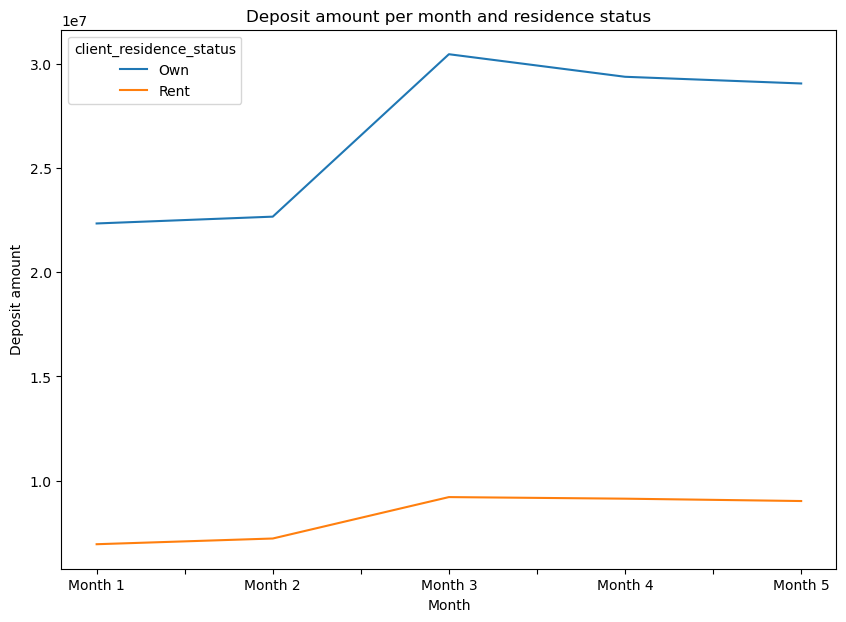

In [29]:
ax3 = df.groupby(['client_residence_status', 'month_name'])['deposit_amount'].sum().unstack(level=0)
print(ax2)

ax3.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Deposit amount')
plt.title('Deposit amount per month and residence status')

## Question 1  
### Was the campaign a success?

The campaign starts on the third month. Based on the line plot of deposit amount by month, a huge spike can be seen on the third month onwards which suggests that more client has been acquired as depicted by the higher amount of deposit made from Month 3 to 5.

In [30]:
clients_before_campaign = df[(df['month_name'] == 'Month 1') 
                             | (df['month_name'] == 'Month 2')]['client_id'].unique()
clients_before_campaign.shape[0]

34051

In [31]:
clients_during_campaign = df[(df['month_name'] == 'Month 3')]['client_id'].unique()
clients_during_campaign.shape[0]

43806

In [32]:
clients_after_campaign = df[(df['month_name'] == 'Month 4') 
                             | (df['month_name'] == 'Month 5')]['client_id'].unique()
clients_after_campaign.shape[0]

41862

In [33]:
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

From the campaign, `11544 new clients` have been acquired.

In [34]:
len(set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign))))

752

After the campaign, `752 new clients` have been acquired.

deposit_type  Actual Deposit  Scheduled Deposit
month_name                                     
Month 1                37456              40371
Month 2                38777              41428
Month 3                52223              56282
Month 4                52273              55221
Month 5                51679              54684


Text(0.5, 1.0, 'Deposit count per month and type')

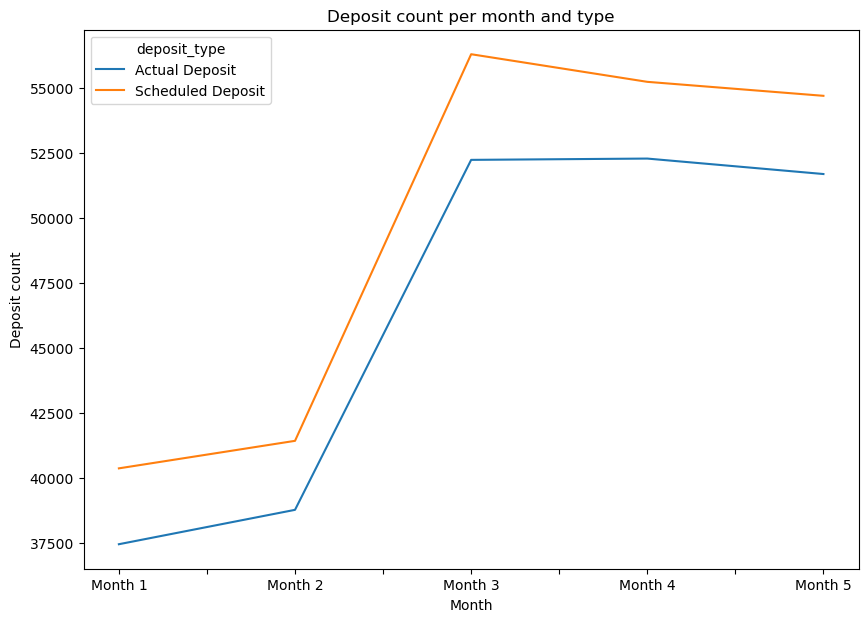

In [35]:
ax4 = df.groupby(['deposit_type', 'month_name']).size().unstack(level=0)
print(ax4)

ax4.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Deposit count')
plt.title('Deposit count per month and type')

### Observations:
- From the campaign, `11544 new clients` have been acquired.
- After the campaign, `752 new clients` have been acquired.
- The line plot above closely matches the distributios of the plots in the analysis section. During the ad campaign, the number of actual and scheduled deposits increases by `10k transactions` and while it gradually decreases in the following months, it still remains very high, at above `50k deposits` per type each.

## Question 2 
### How should the campaign strategy be readjusted in the future to improve performance?

As almost of the plots show similar patterns, one thing that can be explored is targeted marketing. Based on the age distribution plot in the [EDA section](#Exploratory-Data-Analysis), most of the clients are middle-aged `(40-60 years)` and most of them are home owners. 

In [36]:
def discretize_age(row):
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff['age_group'] = dff.apply(discretize_age, axis=1)
dff

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2,2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2,2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2,8
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2,8
...,...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,Month 2,8
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,Month 2,8
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,Month 2,8
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,Month 2,8


age_group     2      3      4      5      6     7     8    9   10
month_name                                                       
Month 1     2123  12468  18104  20209  15149  7620  1960  188   6
Month 2     2246  13152  18656  20752  15488  7722  1993  190   6
Month 3     4006  18837  25641  27504  19898  9955  2431  226   7
Month 4     4195  18814  25497  27242  19467  9747  2315  212   5
Month 5     4003  18612  25171  27040  19291  9701  2328  211   6


Text(0.5, 0, 'Month')

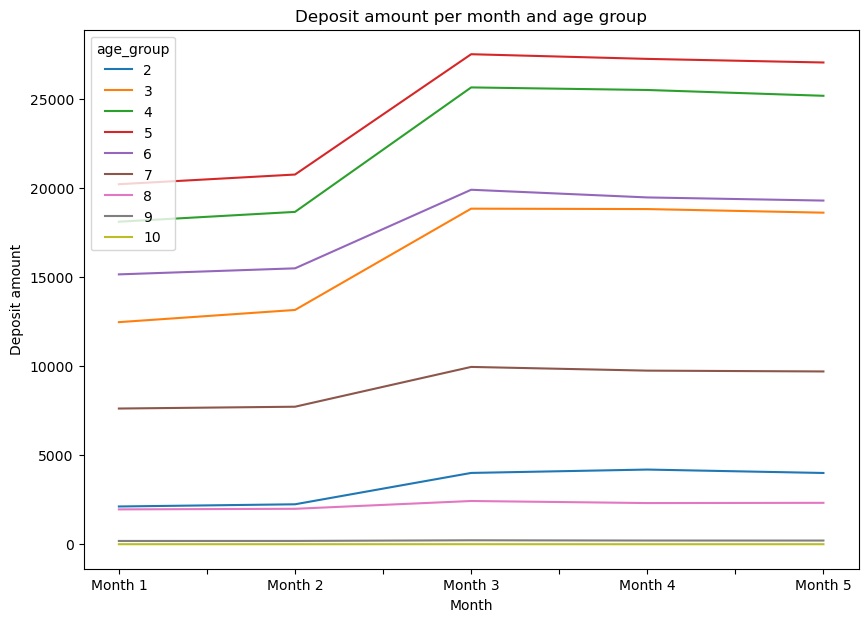

In [37]:
ax5 = dff.groupby(['age_group', 'month_name']).size().unstack(level=0)
print(ax5)

ax5.plot(kind='line')
plt.title('Deposit amount per month and age group')
plt.ylabel('Deposit amount')
plt.xlabel('Month')

The above plot shows a big increase in deposit amount from the middle-aged clients and little to no increase in very young and very old clients.

In [38]:
df_q2 = df[(df['client_residence_status'] == 'Own') 
           & (df['client_age'] <= 60)
          & (df['client_age'] >= 40)]
print('Number of clients that are middle-aged and home owners:', df_q2.shape[0])
print(f'Percentage of middle-aged and home owners clients: {df_q2.shape[0]/df.shape[0] * 100:.2f}%')

Number of clients that are middle-aged and home owners: 181068
Percentage of middle-aged and home owners clients: 37.69%


deposit_type  Actual Deposit  Scheduled Deposit
month_name                                     
Month 1                14162              15122
Month 2                14508              15450
Month 3                19952              21286
Month 4                19784              20733
Month 5                19504              20567


Text(0.5, 1.0, 'Deposit amount per month and type')

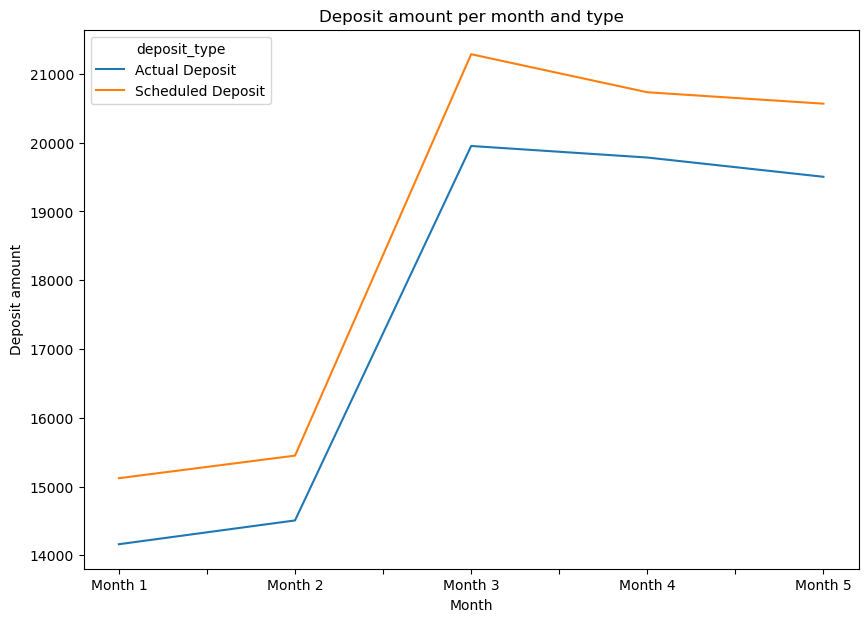

In [39]:
ax6 = df_q2.groupby(['deposit_type', 'month_name']).size().unstack(level=0)
print(ax6)

ax6.plot(kind='line')
plt.xlabel("Month")
plt.ylabel("Deposit amount")
plt.title("Deposit amount per month and type")

In [40]:
extra_deposit_df_q2 = df_q2[df_q2['deposit_cadence'] == 'Extra']['deposit_amount'].sum()
extra_deposit_df = df[df['deposit_cadence'] == 'Extra']['deposit_amount'].sum()

percentage = extra_deposit_df_q2/extra_deposit_df
print(f'This sub-group of clients is responsible for {percentage * 100:.0f}% of the extra deposit amount, yet only represents 37% of clients')

This sub-group of clients is responsible for 42% of the extra deposit amount, yet only represents 37% of clients


There are also other demographic groups to be explored to identify client groups that are of interest.

In [41]:
df[df['deposit_cadence'] == 'Extra']['client_geographical_region'].value_counts()

West         3570
South        1991
Midwest      1486
Northeast    1300
Name: client_geographical_region, dtype: int64

In [42]:
df[df['deposit_cadence'] == 'Extra']['client_residence_status'].value_counts()

Own     5856
Rent    2491
Name: client_residence_status, dtype: int64

In [43]:
df[df['deposit_cadence'] == 'Extra']['month_name'].value_counts()

Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: month_name, dtype: int64

### Observations:
- Clients from the `middle-aged` and `home owners` sub-group contributes to  `42%` of the extra deposit amount while only represents `37%` of the clients.
- Most of the clients that make extra deposit are from the `West` region.
- Clients who **own their residence** are approximately `2.33 times` as likely to deposit extra amount than clients who rent their residence.

## Question 3
### How would the performance of campaign have changed if it was postponed to month 6?

To simulate the postponement of the campaign, the deposits from the new client will be postponed from the third month to the sixth month. This is based on the assumption that the clients that made their first deposit in month 3 are acquired due to the campaign.

In [44]:
df_copy = df.copy(deep=True)

In [45]:
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))

In [46]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == 'Month 3':
            row.month_name = 'Month 6'
        elif row.month_name == 'Month 4':
            row.month_name = 'Month 7'
        elif row.month_name == 'Month 5':
            row.month_name = 'Month 8'
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)            

In [47]:
df_copy['deposit_date'].max()

Timestamp('2020-01-29 00:00:00')

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


Text(0.5, 0, 'Month')

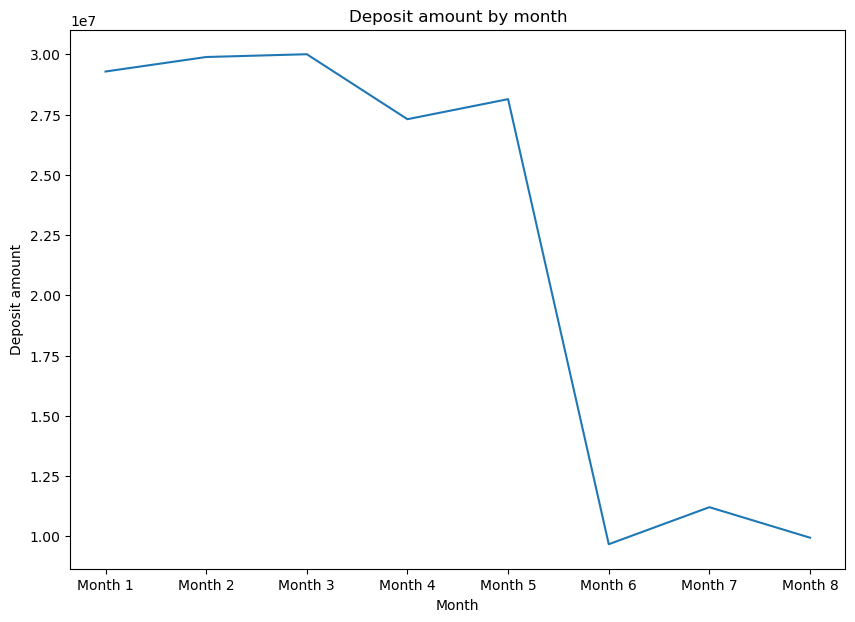

In [48]:
deposit_amount_by_month_extended = df_copy.groupby(['month_name'])['deposit_amount'].sum()

print(deposit_amount_by_month_extended)

plt.plot(deposit_amount_by_month_extended)
plt.title('Deposit amount by month')
plt.ylabel('Deposit amount')
plt.xlabel('Month')

The plot needs to be refined as data in months 6, 7, and 8 are only from the new customers. 

To simulate the deposits coming from existing customers, an average deposit amount from the previous months will be added.

In [49]:
avg_month_deposit = (df_copy.groupby('month_name')['deposit_amount'].sum()).mean()
avg_month_deposit

21930414.27375

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


Text(0.5, 0, 'Month')

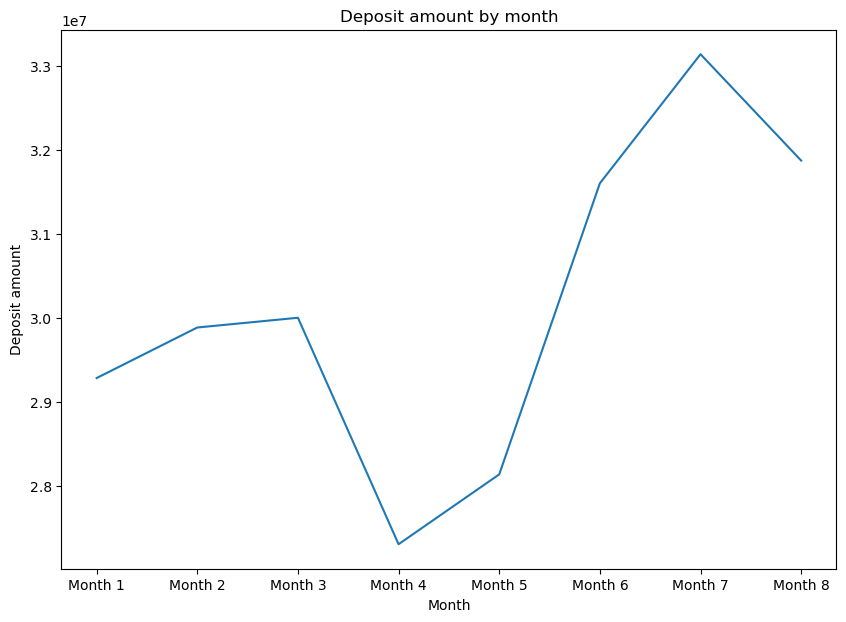

In [50]:
deposit_amount_by_month = df_copy.groupby('month_name')['deposit_amount'].sum()

deposit_amount_by_month.at['Month 6'] += avg_month_deposit
deposit_amount_by_month.at['Month 7'] += avg_month_deposit
deposit_amount_by_month.at['Month 8'] += avg_month_deposit

print(deposit_amount_by_month)

plt.plot(deposit_amount_by_month)
plt.title('Deposit amount by month')
plt.ylabel('Deposit amount')
plt.xlabel('Month')

### Observations:
- During the month the campaign was running, Free Debt Relief received almost \\$2.5 million increase in deposit amounts than previous months, compared to \\$10 million in **Question 1**.
- In the month following the campaign, the total deposit amount continues to increase to reach its maximum at \\$33 million. In the last month, it drops to \\$31 million but remains on a higher level than pre-campaign.
- The cost of the campaign was \\$5 million and the inccured deposit amount increased by a total of \\$8 million. In **Question 1** this number was much higher: \\$26 million. So, since \\$8 million is much lower, we conclude that postponing the campaign would not have been the right choice.

In [51]:
df.to_csv('marketing_data.csv')
df_copy.to_csv('marketing_data_postponed.csv')